In [27]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [28]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20)

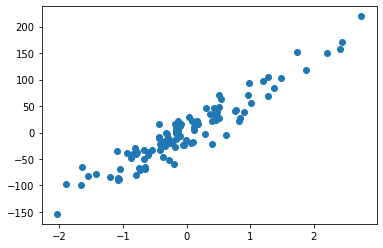

In [29]:
plt.scatter(X,y)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [52]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.coef_

array([65.79131464])

In [53]:
reg.intercept_

2.2654950466200985

In [32]:
from sklearn.model_selection import cross_val_score

In [54]:
y_pred = reg.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9013810835298224

In [55]:
class GDRegressor:
    
    def __init__(self, learning_rate, epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self,X, y):
        
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m * X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m * X.ravel() - self.b)* X.ravel())
            self.b = self.b - (loss_slope_b * self.lr)
            self.m = self.m - (loss_slope_m * self.lr)
        print(self.m, self.b)
        
    def predict(self,X):
        return self.m * X + self.b
    

In [62]:
gd = GDRegressor(0.001, 100000)

In [63]:
gd.fit(X_train,y_train)

65.79131464464916 2.2654950466201016


In [64]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9013810835298224